# KNN

O algorítmo denominado de KNN vem da abreviação do nome _K nearest neighboors_, que significa o K vizinhos mais próximos. É um dos classificadores mais comums e utilizados em problemas de classificação. É bastante usado também por ter bons resultados e ser de fácil compreensão.

O KNN tem o objetivo de classificar o dado de uma amostra, baseado em amostras vizinhas. Em sua implementação matemática, dois pontos chaves são traçados, que são a distância e o valor de K. Para representar a distância, é comumente utilizada a Distância Euclidiana, mas existem outras formas de representá-la.

O valor de K pode ser variado, cabendo à quem implementa determinar o seu valor. É recomendado que o K seja um valor ímpar ou primo, mas é possível também que valores comuns sejam adequados pro seu problema. Para achar o melhor valor de K, existem várias técnicas para otimizar o seu algorítmo, mas essa procura pode tornar o desempenho do modelo mais lento. Ainda assim, o valor de K mais usado para problemas simples é através do método empírico.

Abaixo, segue a implementação do KNN com algumas técnicas diferentes.

Importando as bibliotecas para manipulação dos dados

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Adicionando um _header_ com o nome das colunas correspodentes e transformando em um _dataframe_

In [262]:
columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'classification']
df = pd.read_csv('nursery.data.csv', header=None, names=columns)
df.head()

,parents,has_nurs,form,children,housing,finance,social,health,classification
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


Mostrando informações sobre o _dataframe_

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
parents           12960 non-null object
has_nurs          12960 non-null object
form              12960 non-null object
children          12960 non-null object
housing           12960 non-null object
finance           12960 non-null object
social            12960 non-null object
health            12960 non-null object
classification    12960 non-null object
dtypes: object(9)
memory usage: 911.3+ KB


Mostrando um review sobre as colunas do _dataframe_

In [264]:
df.describe()

,parents,has_nurs,form,children,housing,finance,social,health,classification
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,pretentious,critical,complete,more,critical,inconv,slightly_prob,priority,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


Retirando as _features_ do _dataframe_ e transformando-as em valores _dummy_, pois todas são categóricas

In [265]:
features = pd.get_dummies(df.drop('classification', axis=1))
features.head()

,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
3,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0


Transformando os valores categóricos da coluna _target_ em valores numéricos

In [305]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
numeric_classification = le.fit_transform(df['classification'])
numeric_classification

array([2, 1, 0, ..., 3, 3, 0])

Após isso, o _dataframe_ está pronto para ser utilizado.

Abaixo, segue a implementação do KNN utilizando algumas técnicas diferentes.

## 1. KNN + train_test_split

Como o nosso problema não tinha um _dataset_ de teste, a primeira técnica utilizada foi para separar o _dataframe_ em subamostras para treino e para teste. Para isso, foi utilizado o `train_test_split` do Scikit Learn.

Importando o método e separando em subamostras, utilizando 30% do dataframe para teste.

In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, numeric_classification, test_size=0.3, random_state=42)

Após isso, foi criado um _loop_ para verificar qual o vizinho que, ao implementar o KNN, tem a maior acurácia ao final do teste. Os valores dos _scores_ de treino e de teste foram salvos para, posteriormente, ser plotado um gráfico para tirarmos conlusões.

In [295]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
scores_train = []
predicts = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict = knn.predict(X_test)
    predicts.append(predict)
    score = knn.score(X_test, y_test)
    scores.append(score)
    score_train = knn.score(X_train, y_train)    
    scores_train.append(score_train)

Com o valor dos _scores_ guardados foi, possível gerar o gráfico contendo todos os vizinhos testados.

Com o gráfico, nota-se que não houve _overfitting_ e nem _underfitting_, pois há uma uma alta precisão nos dados de teste e nos dados de treino, tendo os valores muito próximos. Não há uma discrepância notável entre os dois, de acordo com os dados mostrados no gráfico.

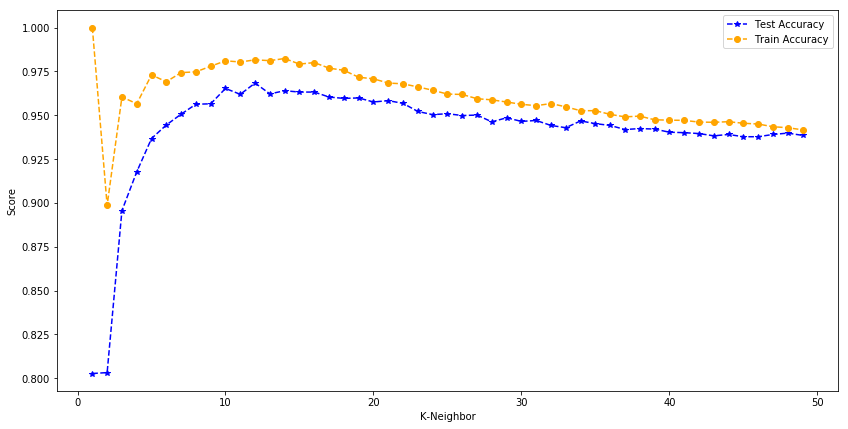

In [296]:
plt.figure(figsize=(14, 7))
plt.plot(range(1, 50), scores, color='blue', linestyle='dashed', marker='*', label='Test Accuracy')
plt.plot(range(1, 50), scores_train, color='orange', linestyle='dashed', marker='o', label='Train Accuracy')
plt.legend()
plt.xlabel('K-Neighbor')
plt.ylabel('Score')
plt.show()

No fim, temos que o vizinho número 11 é o que teve a o maior _score_, sendo então o K escolhido para os demais testes.

In [297]:
np_scores = np.array(scores)
ind = np_scores.argmax()
print('K:', ind, '| Accuracy:', scores[ind])

K: 11 | Accuracy: 0.9683641975308642


In [303]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicts[ind]))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1320
          1       0.94      0.97      0.95      1272
          2       0.00      0.00      0.00         2
          3       0.97      0.97      0.97      1190
          4       0.97      0.57      0.72       104

avg / total       0.97      0.97      0.97      3888



/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [306]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predicts[ind])

array([[1320,    0,    0,    0,    0],
       [   0, 1233,    0,   39,    0],
       [   0,    0,    0,    0,    2],
       [   0,   37,    0, 1153,    0],
       [   0,   45,    0,    0,   59]])

## 2. KNN + StratifiedKFold

Neste caso, foi utilizado o método `StratifiedKFold`. É uma forma de fazer um _cross-validator_ utilizando o método `KFold`. Cada _fold_ é feita preservando a porcentagem de amostras para cada classe. O método `StratifiedKFold` utiliza apenas _folds_ estratificados. O `KFold` gera, de acordo com o número designado, sub-amostras contendo posições aleatórias.

Importando o método para utilizar o KFold.

In [235]:
from sklearn.model_selection import StratifiedKFold

Foi designando para a seleção ser dividida em 3 sub-amostras. Após isso, foi gerado um _loop_ para percorres os _splits_. O modelo KNN com cada uma dessas amostras foi guardando juntamente com o seu _score_ para descobrir qual teve a maior acurácia.

In [278]:
kf = KFold(n_splits=3)
models = []
scores = []
for train, test in kf.split(features):
    knn = KNeighborsClassifier(n_neighbors=11)
    knn.fit(features.values[train], numeric_classification[train])
    score = knn.score(features.values[test], numeric_classification[test])
    models.append(knn)
    scores.append(score)

No fim, foi comprovado que o _split_ da posição 0 foi o mais eficaz, pois ele teve a maior acurácia dentre eles. Apesar disto, utilizando este método, obtivemos uma acurácia menor do que a do modelo 1.

In [283]:
np_scores = np.array(scores)
ind = np_scores.argmax()
print('K:', ind, '| Accuracy:', scores[ind])

K: 0 | Accuracy: 0.8557870370370371


## 3. KNN + cross_val_score

Por último, foi utilizado como técnica para gerar as amostras, o `cross_val_score`. Este método utiliza a validação cruzada para avaliar o modelo.

Importando o modelo de validação cruzada.

In [284]:
from sklearn.model_selection import cross_val_score

Ainda utilizando o 11 como o melhor vizinho, foi passado o modelo para o método para fazer a avaliação.

In [16]:
knn = KNeighborsClassifier(n_neighbors=11)
cv_scores = cross_val_score(knn, features, numeric_classification, cv=10)

NameError: name 'cross_val_score' is not defined

No fim, foi verificado que o split de melhor _score_ foi o de número 9.

In [292]:
np_cv_scores = np.array(cv_scores)
ind = np_cv_scores.argmax()
print('Best:', ind, '| Accuracy:', cv_scores[ind])

Best: 9 | Accuracy: 0.8493044822256569
